  Fund  TOPSIS Score
0   M3      0.707345
1   M4      0.627975
2   M1      0.598403
3   M8      0.501013
4   M7      0.486117
5   M6      0.406750
6   M2      0.361607
7   M5      0.219236


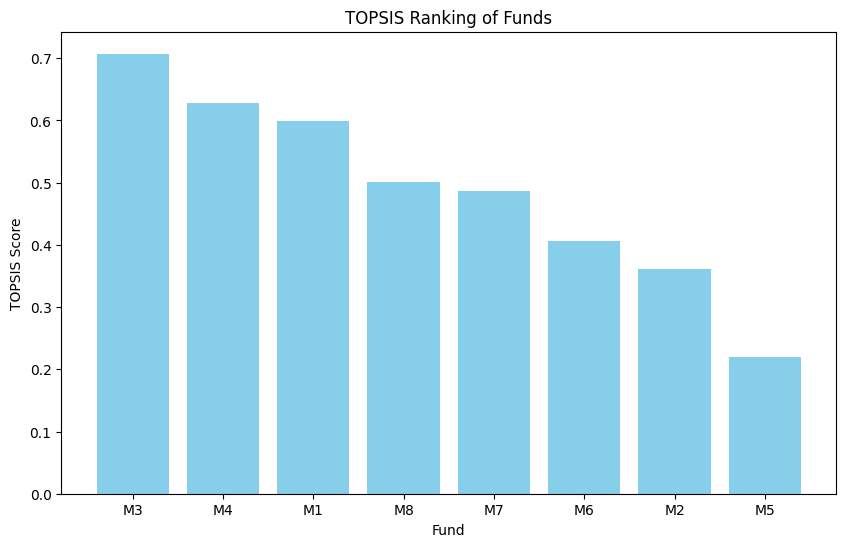

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Given data
X = np.array([
    [0.91, 0.83, 3.5, 55, 15.06],
    [0.81, 0.66, 4.2, 36.6, 10.57],
    [0.84, 0.71, 6.0, 53.7, 15.31],
    [0.70, 0.49, 5.3, 68.0, 18.62],
    [0.67, 0.45, 4.6, 35.2, 10.23],
    [0.62, 0.38, 3.3, 60.5, 16.2],
    [0.91, 0.83, 5.1, 32.6, 9.86],
    [0.77, 0.59, 3.4, 58.7, 15.87]
])

funds = ["M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8"]

# Weights (equal weights assumed)
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# Benefit and cost criteria indexes
benefit_criteria = [0, 1, 2]  # P1, P2, P3 (Higher is better)
cost_criteria = [3, 4]        # P4, P5 (Lower is better)

# Step 1: Normalize the matrix
norm_X = X / np.sqrt((X**2).sum(axis=0))

# Step 2: Weighted Normalization
weighted_X = norm_X * weights

# Step 3: Determine ideal best and worst
ideal_best = np.max(weighted_X, axis=0)  # Max for benefit, Min for cost
ideal_worst = np.min(weighted_X, axis=0)

# Step 4: Calculate distances from ideal best & worst
dist_best = np.sqrt(((weighted_X - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((weighted_X - ideal_worst) ** 2).sum(axis=1))

# Step 5: Compute TOPSIS score
topsis_scores = dist_worst / (dist_best + dist_worst)

# Rank funds
rankings = np.argsort(topsis_scores)[::-1]

# Create a DataFrame for better visualization
results_df = pd.DataFrame({
    "Fund": [funds[i] for i in rankings],
    "TOPSIS Score": [topsis_scores[i] for i in rankings]
})
print(results_df)

# Plot the rankings
plt.figure(figsize=(10, 6))
plt.bar(results_df["Fund"], results_df["TOPSIS Score"], color='skyblue')
plt.xlabel("Fund")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Funds")
plt.show()